# Sales Data Analytics Project

## Objective
To analyze retail sales data and identify trends, top-performing categories,
sub-categories, and regional sales performance using exploratory data analysis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(
    "data/sales.csv",
    encoding="latin1",
    engine="python",
    on_bad_lines="skip"
)

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


## Data Understanding
The dataset contains 9,800 rows and 18 columns, including order details,
customer information, product categories, and sales values.

In [4]:
df.shape

(9800, 18)

In [5]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [7]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

## Data Cleaning
Missing values and data type inconsistencies were handled to prepare the
dataset for analysis.

In [8]:
df['Order Date'] = pd.to_datetime(
    df['Order Date'],
    format='mixed',
    dayfirst=True,
    errors='coerce'
)

df['Ship Date'] = pd.to_datetime(
    df['Ship Date'],
    format='mixed',
    dayfirst=True,
    errors='coerce'
)

In [9]:
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month


## Category-wise Sales Analysis
This analysis compares total sales across different product categories.

In [10]:
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
category_sales

Category
Technology         827455.8730
Furniture          728658.5757
Office Supplies    705422.3340
Name: Sales, dtype: float64

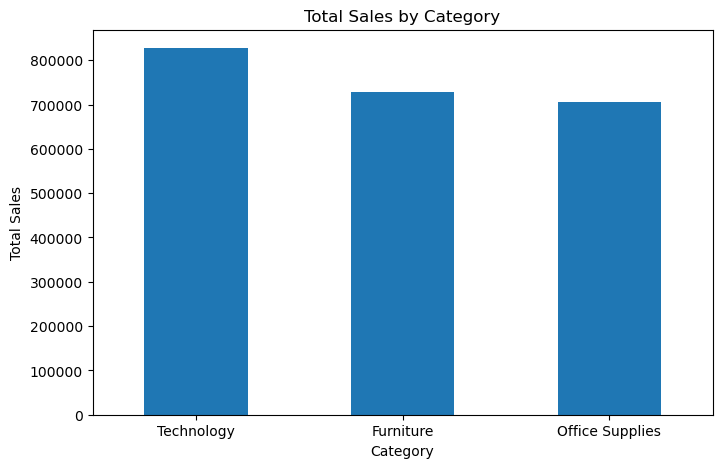

In [11]:
plt.figure(figsize=(8,5))
category_sales.plot(kind='bar')
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.show()

### Insights
- Technology is the highest revenue-generating category.
- Furniture and Office Supplies follow with comparable sales figures.
- The dominance of Technology indicates strong demand for high-value products.

## Year-wise Sales Trend
This analysis examines how total sales have changed over time.

In [12]:
yearly_sales = df.groupby('Year')['Sales'].sum()
yearly_sales

Year
2015    479856.2081
2016    459436.0054
2017    600192.5500
2018    722052.0192
Name: Sales, dtype: float64

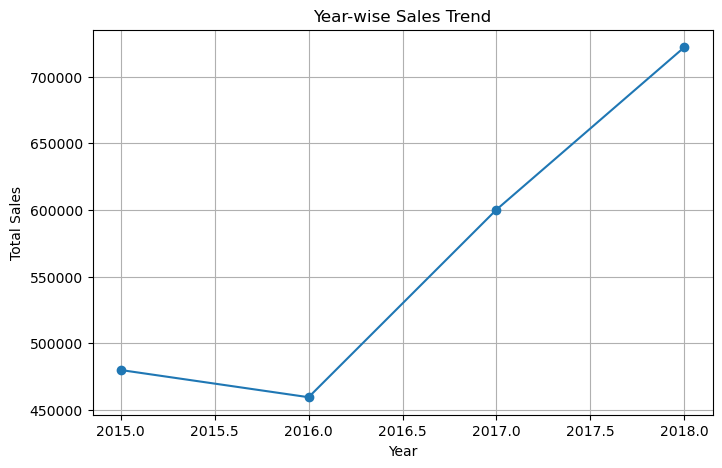

In [13]:
plt.figure(figsize=(8,5))
yearly_sales.plot(kind='line', marker='o')
plt.title('Year-wise Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

### Insights
- Sales declined slightly from 2015 to 2016.
- A strong growth trend is observed from 2016 to 2018.
- 2018 recorded the highest sales, indicating peak performance.

## Top 10 Sub-Categories by Sales
This analysis identifies the sub-categories contributing the most revenue.

In [14]:
subcat_sales = (
    df.groupby('Sub-Category')['Sales']
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

subcat_sales

Sub-Category
Phones         327782.4480
Chairs         322822.7310
Storage        219343.3920
Tables         202810.6280
Binders        200028.7850
Machines       189238.6310
Accessories    164186.7000
Copiers        146248.0940
Bookcases      113813.1987
Appliances     104618.4030
Name: Sales, dtype: float64

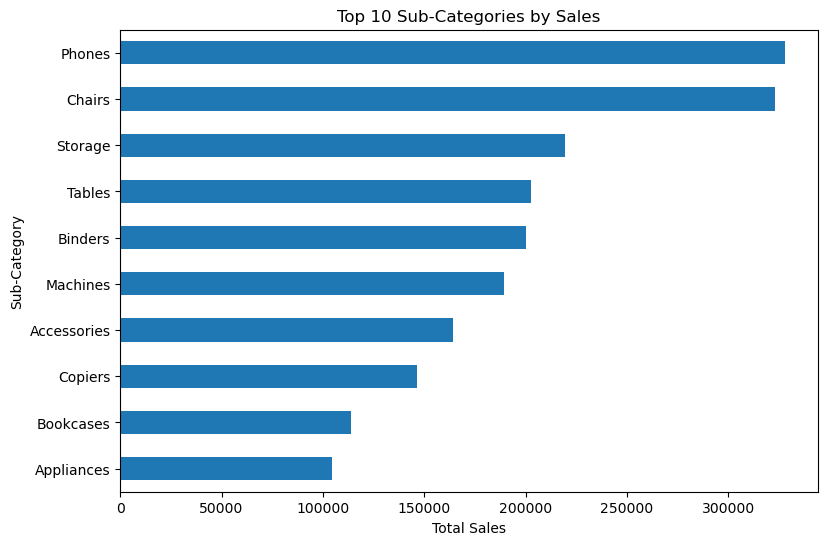

In [15]:
plt.figure(figsize=(9,6))
subcat_sales.plot(kind='barh')
plt.title('Top 10 Sub-Categories by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Sub-Category')
plt.gca().invert_yaxis()
plt.show()

### Insights
- Phones and Chairs are the top revenue-generating sub-categories.
- Technology-related sub-categories dominate the top 10.
- Lower-performing sub-categories may require pricing or marketing optimization.

## Region-wise Sales Performance
This section analyzes sales distribution across regions.

In [16]:
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
region_sales

Region
West       710219.6845
East       669518.7260
Central    492646.9132
South      389151.4590
Name: Sales, dtype: float64

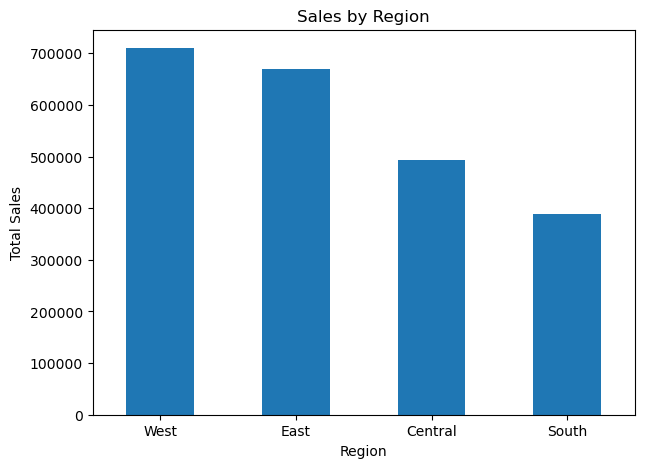

In [17]:
plt.figure(figsize=(7,5))
region_sales.plot(kind='bar')
plt.title('Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.show()

### Insights
- West is the highest-performing region.
- East also shows strong sales performance.
- South region has the lowest sales, indicating growth opportunities.

## Conclusion
The analysis highlights Technology as the top-performing category, strong sales
growth over time, and regional disparities in performance. These insights can
support strategic decision-making and business planning.